In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [21]:

print(len(df))
df = df[df["Are you self-employed?"] != 1]
df = df[(df["Are you self-employed?"] != 1) & (df["Is your primary role within your company related to tech/IT?"].isin(['', 1, np.nan]))]
replace_dict = {"nonbinary":1,'female': 2, 'Female': 2, 'F':2, 'f':0,'M': 0, 'm':0, 'Male':0, 'male':0,"woman":2,"cis male":0, "Cis male":0, "dude":0}
df["What is your gender?"] = df["What is your gender?"].replace(replace_dict, regex=True)
df["What is your gender?"] = df["What is your gender?"].replace(to_replace=r'[^0-2]', value=1, regex=True)
print(df['What is your gender?'].value_counts())

1433
0.0    876
2.0    237
1.0     15
Name: What is your gender?, dtype: int64


In [22]:
df['What country do you live in?'].value_counts()

United States of America    695
United Kingdom              134
Canada                       63
Germany                      43
Netherlands                  31
Australia                    26
Sweden                       14
France                       11
Ireland                      10
Brazil                        9
Russia                        9
India                         7
Bulgaria                      6
New Zealand                   6
Switzerland                   6
Italy                         5
Finland                       5
Denmark                       5
South Africa                  4
Chile                         3
Norway                        3
Spain                         3
Belgium                       3
Pakistan                      3
Israel                        2
Bosnia and Herzegovina        2
Poland                        2
Romania                       2
Afghanistan                   2
Estonia                       2
Colombia                      2
Mexico  

In [23]:
df.replace('Not eligible for coverage / N/A', np.nan, inplace = True)
df.replace('Not applicable to me', np.nan, inplace = True)
df.replace('I am not sure', 'Unsure', inplace = True)
df.replace("I don't know", 'Unsure', inplace = True)
df.replace('Very difficult', 5, inplace = True)
df.replace('Somewhat difficult', 4, inplace = True)
df.replace('Neither easy nor difficult', 3, inplace=True)
df.replace('Somewhat easy', 2, inplace = True)
df.replace('Very easy', 1, inplace = True)
df.replace("Yes", 1, inplace = True)
df.replace("Yes, always", 1, inplace = True)
df.replace("Maybe", 0.5, inplace=True)
df.replace("Sometimes", 0.5, inplace=True)
df.replace("No", 0, inplace=True)
df['Do you feel that your employer takes mental health as seriously as physical health?'].replace("Unsure", 0.5, inplace = True)
df.replace("Some did", 0.5, inplace = True)
df.replace("Some of them", 0.5, inplace = True)
df.replace("No, none did", 0, inplace = True)
df.replace("None of them", 0, inplace = True)
df.replace("None did", 0, inplace = True)
df.replace("Yes, they all did", 1, inplace = True)
df.replace("N/A (not currently aware)", np.nan, inplace = True)
df.replace("I was aware of some", 0.5, inplace = True)
df.replace("No, I only became aware later", 0, inplace = True)
df.replace("Yes, I was aware of all of them", 1, inplace = True)
df.replace("Yes, all of them", 1, inplace = True)
df.replace("Yes, at all of my previous employers", 1, inplace = True)
df.replace("No, at none of my previous employers", 0, inplace = True)
df.replace("Some of my previous employers", 0.5, inplace = True)
df['Do you feel that being identified as a person with a mental health issue would hurt your career?'].replace(0.5, 3, inplace = True)
df['Do you feel that being identified as a person with a mental health issue would hurt your career?'].replace("Yes, I think it would", 4, inplace = True)
df['Do you feel that being identified as a person with a mental health issue would hurt your career?'].replace("Yes, it has", 5, inplace = True)
df['Do you feel that being identified as a person with a mental health issue would hurt your career?'].replace("No, I don't think it would", 2, inplace = True)
df['Do you feel that being identified as a person with a mental health issue would hurt your career?'].replace("No, it has not", 1, inplace = True)
df['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].replace(0.5, 3, inplace = True)
df['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].replace("Yes, I think they would", 4, inplace = True)
df['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].replace("Yes, they do", 5, inplace = True)
df['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].replace("No, I don't think they would", 2, inplace = True)
df['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].replace("No, they do not", 1, inplace = True)
df['How willing would you be to share with friends and family that you have a mental illness?'].replace("Somewhat open", 4, inplace = True)
df['How willing would you be to share with friends and family that you have a mental illness?'].replace("Very open", 5, inplace = True)
df['How willing would you be to share with friends and family that you have a mental illness?'].replace("Somewhat not open", 2, inplace = True)
df['How willing would you be to share with friends and family that you have a mental illness?'].replace("Not open at all", 1, inplace = True)
df['How willing would you be to share with friends and family that you have a mental illness?'].replace("Neutral", 3, inplace = True)
df['How willing would you be to share with friends and family that you have a mental illness?'].replace("Not applicable to me (I do not have a mental illness)", np.nan, inplace = True)
df.replace("Maybe/Not sure", 0.5, inplace = True)
df.replace("Yes, I observed", 1, inplace = True)
df.replace("Yes, I experienced", 2, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].replace(0.5, 2, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].replace("Rarely", 1, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].replace("Often", 3, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].replace("Never", 0, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].replace(0.5, 2, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].replace("Rarely", 1, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].replace("Often", 3, inplace = True)
df['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].replace("Never", 0, inplace = True)
df['Do you work remotely?'].replace("Always", 1, inplace = True)
df['Do you work remotely?'].replace("Never", 0, inplace = True)

<AxesSubplot:xlabel='What is your age?', ylabel='Count'>

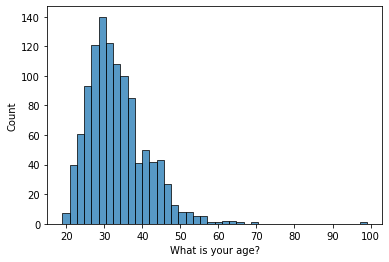

In [26]:
df = df[(df['What is your age?'] > 18) & (df['What is your age?'] < 100)]
sns.histplot(data = df, x = "What is your age?")